<font size=5> 應數四 吳榮峻

<font color = blue size=6  ><br/>
目標:預測搭乘鐵達尼號的乘客倖存與否

![流程圖](https://lh3.googleusercontent.com/afMRcZt4h4AYevzO7hYV3iAwNO2eTLjSucfdXpFwfafMcJpwixypdA_T9OXS4IrMqcNMrimUyaDO7EE1CBnqlOY9K3ep1YJRPyBVACz67uc-lgbn8IDG8yKjjW4rzeo5GPLSCk_40ASWICIOa0iM5QM-u0E8ZhBxMiJTEVHrATwrwGdU-TgUwcaAn3PS7uXzmQ3XBwUduNXNz8STlQWWOv3fsYcuec_urrxZ8gaUpLcK7-5IbloRsmKW9EhZUh_UEsQ1049pN9HtWINLvwGVOqEVMoqNCZ_KYRkiUvNb6loxFgSvBQU3OSVWq6uvoN1t3ka8BIz5WmK3HvaCZx5wkNXADznNfyYD53ogJrZNPSXFPNzEdlIrJglkUt2PZA04bWKJtE24V1O8fm_bPwursUtsyh5YTTg7cdBeLoZt_XOAZ-VpMOmGbeHqR9VsbiaAoF05U6otC7znVLJoozDMW5ZdPjcXZDuiSK2pmxpzn4_3JzTlb2bj00Fw99ASgnexvwUUGtrgZLj4YhMFStTysF_M7v8NVD8K2YYTNsVkh27PfVhk89IaJXkgIvbMzCe3l3Pgf6PfT4rKVIPqe73VLuVTCs3nzv5A18eJWmd9-MiyRYHOqyVwmTOs2xHjWb4VyfKQsMVNqzOw7nsDouLnBgZM4u5k_BJXJTupfh2VF8CaOHNQnRVKOYcIdCmLIw=w640-h360-no?authuser=0)

# ●讀取資料

In [1]:
import pandas as pd
train= pd.read_csv("https://kaggle-getting-started.s3-ap-northeast-1.amazonaws.com/titanic/train.csv")
test = pd.read_csv("https://kaggle-getting-started.s3-ap-northeast-1.amazonaws.com/titanic/test.csv")

In [2]:
train.shape, test.shape

((891, 12), (418, 11))

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


變數說明
* PassengerId-旅客編號
* Survived-倖存與否(1:是，0:否)
* Pclass-票務艙等 (1 = 1st, 2 = 2nd, 3 = 3rd)
* Name-名子
* Sex-性別
* Age-年齡
* SibSp-船上的兄弟姐妹配偶人數
* Parch-船上的父母子女人數
* Ticket-票號
* Fare-乘客票價
* Cabin-艙
* Embarked-登船港口(C = Cherbourg(瑟堡), Q = Queenstown(皇后鎮), S = Southampton(修咸頓))

![航線](https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic_voyage_map.png)

# ●數據探索

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt

<font color = blue size=5>  Survived

In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


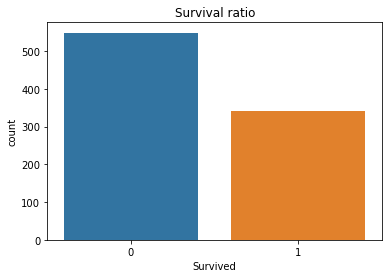

In [6]:
import numpy as np
sns.countplot(train.Survived)
plt.title("Survival ratio")
plt.show()

<font  size=4  > Survived: 38% <br/> 
    
      

<font color = blue size=5>  Sex

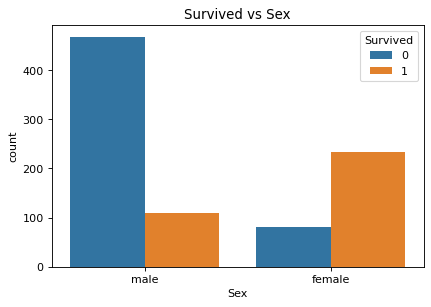

In [7]:
plt.figure(dpi=80)
plt.title("Survived vs Sex")
sns.countplot(x="Sex", hue="Survived", data=train)

In [8]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<font  size=4  > 明顯得知，女性的存活率高許多(高達74%) <br/> 

<font color = blue size=5>  Pclass

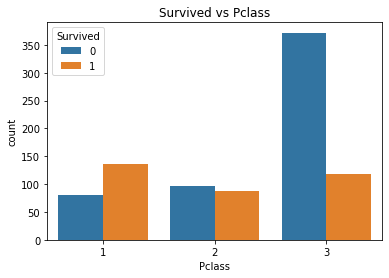

In [9]:
plt.title("Survived vs Pclass")
sns.countplot(x="Pclass", hue="Survived", data=train)


In [10]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<font  size=4  > 頭等艙的存活率最高(62%) <br/> 

<font color = blue size=5>  Age

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


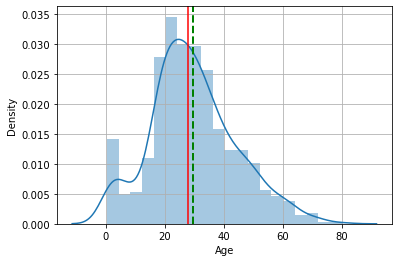

In [11]:
sns.distplot(train["Age"]) # 繪製直方密度圖
plt.grid()
plt.axvline(train["Age"].median(), color='red')
plt.axvline(train["Age"].mean(), color='green', linestyle='dashed', linewidth=2)
plt.show() 

<font  size=4  > 1. 年齡為右偏的分佈( mean > median)<br/>2. 船上年輕人與中年人(20~40歲)占大多數比例 <br/> 3. 平均年齡: 29.7 ，中位數:28，最大值:80，最小值:0.42

In [12]:
#print(max(train["Age"]), min(train["Age"]), train["Age"].mean(), train["Age"].median())

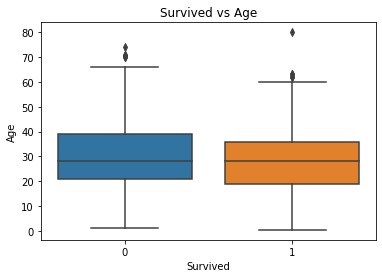

In [13]:
sns.boxplot(x='Survived', y='Age', data=train)
plt.title("Survived vs Age")
plt.show()

<font  size=4  > 倖存者大多為年輕人(20~40歲)

<font color = blue size=5>  SipSp

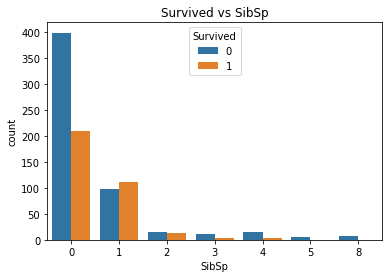

In [14]:
plt.title("Survived vs SibSp")
sns.countplot(x="SibSp", hue="Survived", data=train)

In [15]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

<font  size=4  > 1. 船上的旅客，大多數有1位兄弟姊妹配偶 <br/> 2. 有1位兄弟姊妹配偶的旅客存活率較高(54%)

<font color = blue size=5>  Parch

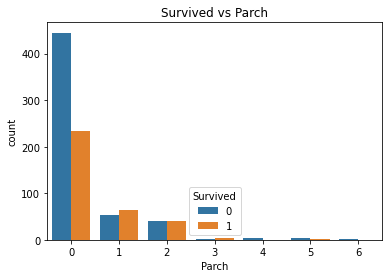

In [16]:
plt.title("Survived vs Parch")
sns.countplot(x="Parch", hue="Survived", data=train)

In [17]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

 <font  size=4  > 1. 船上的旅客，大多數有1~2位父母子女 <br/> 2. 有1位父母子女的旅客存活率較高(55%)

<font color = blue size=5> Fare

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


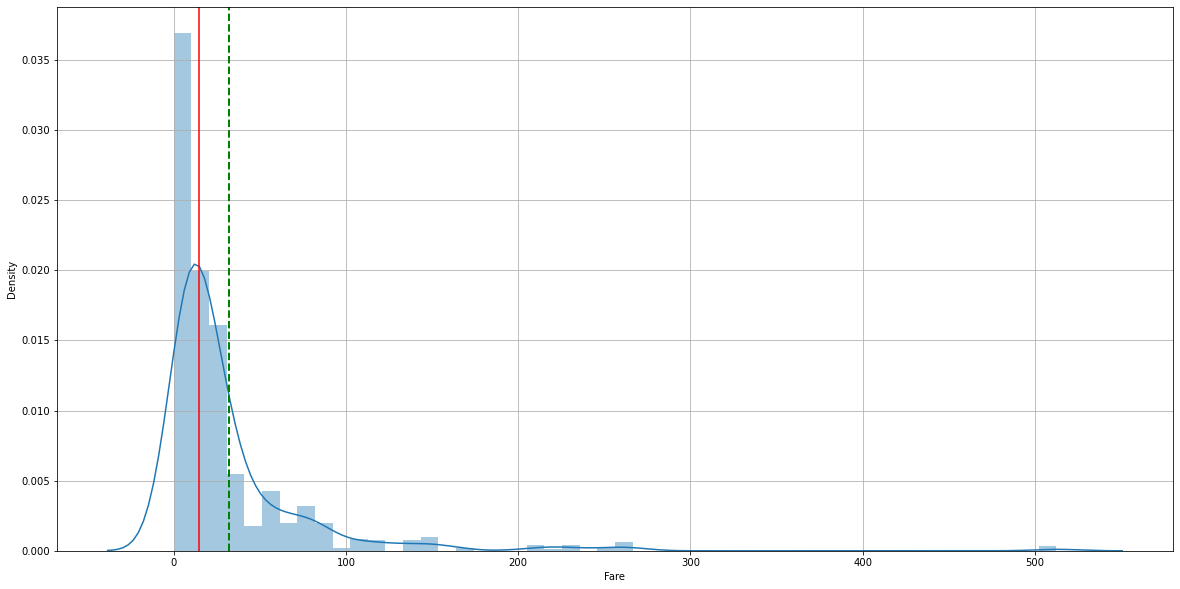

In [18]:
plt.figure(figsize=(20, 10))
sns.distplot(train["Fare"])  # 繪製直方密度圖
plt.grid()
plt.axvline(train["Fare"].median(), color='red')
plt.axvline(train["Fare"].mean(), color='green',
            linestyle='dashed', linewidth=2)
plt.show()

<font  size=4  > 1. 票價的分布呈現右偏 ( mean > median) <br/> 2. 票價平均:32.20，中位數:14.4542，最大值:512.3292，最小值:0

In [19]:
#print(max(train["Fare"]), min(train["Fare"]), train["Fare"].mean(), train["Fare"].median())

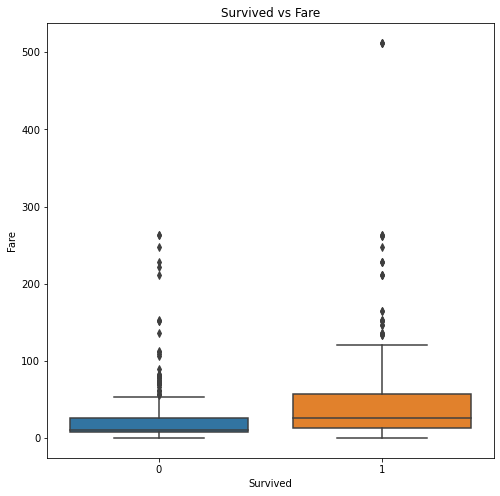

In [20]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title("Survived vs Fare")
plt.show()

 <font  size=4  > 票價相對高的旅客存活率較高

<font color = blue size=5> Embarked

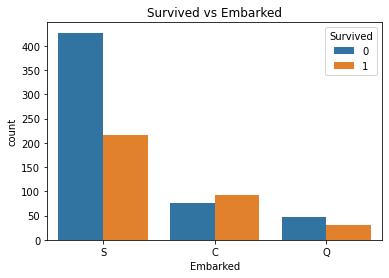

In [21]:
plt.title("Survived vs Embarked")
sns.countplot(x="Embarked", hue="Survived", data=train)

In [22]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

  <font  size=4  > 1. 乘客大多數是Southampton(修咸頓)站上船的 <br/>2. 在Cherbourg(瑟堡)上船的旅客存活率相對較高(55%)

# ●特徵工程

<font color = blue size=5> Train資料的遺漏值

In [23]:
#檢查是否有遺漏值
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<font color = blue size=5>將Train資料與Test資料合併,命名為data

In [24]:
#合併Data,以利做特徵工程，之後再分割
data= train.append(test)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<font color = blue size=5> Data資料的遺漏值

In [25]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<font color = blue size=5>由於變數Cabin(船艙)遺失值過多，很難衡量用什麼值去填入，故刪除此欄位(變數)

In [26]:
data=data.drop( ['Cabin'], axis=1 )

<font color = blue size=5>處理Fare 與 Embarked的遺失值

In [27]:
#Fare遺失值填入中位數
data['Fare'].fillna(data['Fare'].median(), inplace = True)

In [28]:
#Embarked遺失值填入眾數
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

<font color = blue size=5>新的欄位title(姓名的姓氏)

In [29]:
import re
regex = re.compile( ' ([A-Za-z]+)\.' )  
data['Title'] = data.Name.map( lambda x:regex.search(x)[0] )
# Dropping the first and the last words
data['Title'] = data.Title.map( lambda x:x[1:][:-1] )  
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [30]:
data['Title'] = data.Title.replace( ['Ms','Mlle'], 'Miss' )
data['Title'] = data.Title.replace( 'Mme', 'Mrs' )

In [31]:
data['Title'].value_counts()

Mr          757
Miss        264
Mrs         198
Master       61
Rev           8
Dr            8
Col           4
Major         2
Dona          1
Sir           1
Jonkheer      1
Countess      1
Don           1
Lady          1
Capt          1
Name: Title, dtype: int64

In [32]:
#將Title裡的前六多變數抓出
imp_Title = data["Title"].value_counts()[:6].index.tolist()
imp_Title

['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr']

In [33]:
data["Title"]=data["Title"].apply(lambda x: x if imp_Title else "Other")

<font color = blue size=5>處理Age的遺失值

In [34]:
#Age的遺失值透過Title分群，並將其分類的中位數填入
med_age = {}
for X in imp_Title:
    med_age[X]= data.loc[data.Title == X]["Age"].median()
med_age["Other"] = data.Age.median()
data.loc[data.Age.isnull(), "Age"]= data[data.Age.isnull()]["Title"].map(med_age)

<font color = blue size=5>將分類變數做編碼

In [35]:
# 對性別做標籤編碼 
Sex_mapping = { 'male':0, 'female':1 }
data[ 'Sex' ] = data.Sex.map( Sex_mapping )

In [36]:
# 對Embarked(登船入口)做標籤編碼
Embarked_mapping ={"S":0, "C":1, "Q":2}
data["Embarked"]=data.Embarked.map(Embarked_mapping)

In [37]:
#對 Title 做編碼
from sklearn.preprocessing import LabelEncoder
data["Title"]=LabelEncoder().fit_transform(data.Title)

<font color = blue  size=5>新欄位Age_level

In [38]:
# 新增欄位"Age_level"
train["Age_cut"]=pd.cut(train.Age,6)
train[['Age_cut', 'Survived']].groupby(['Age_cut'], as_index=False).mean().sort_values(by='Age_cut', ascending=True)

,Age_cut,Survived
0,"(0.34, 13.683]",0.591549
1,"(13.683, 26.947]",0.354839
2,"(26.947, 40.21]",0.428571
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857


In [39]:
data["Age_level"]= data["Age"]
data.loc[ data.Age <= 13.683, 'Age_level'] = 0
data.loc[(data.Age > 13.683) & (data.Age <= 26.947), 'Age_level'] = 1
data.loc[(data.Age > 26.947) & (data.Age <= 40.21), 'Age_level'] = 2
data.loc[(data.Age > 40.21) & (data.Age <= 53.473), 'Age_level'] = 3
data.loc[(data.Age > 53.473) & (data.Age <= 66.737), 'Age_level'] = 4
data.loc[data.Age > 66.737, 'Age_level'] =5
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_level
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,11,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,12,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,10,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,12,2.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,11,2.0


<font color = blue size=5>新欄位Fare_level

In [40]:
train["Fare_cut"]=pd.qcut(train.Fare,4)
train[['Fare_cut', 'Survived']].groupby(['Fare_cut'], as_index=False).mean().sort_values(by='Fare_cut', ascending=True)

,Fare_cut,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [41]:
data["Fare_level"]= data["Fare"]
data.loc[ data.Fare <= 7.91, 'Fare_level'] = 0
data.loc[(data.Fare > 7.91) & (data.Fare <= 14.454), 'Fare_level'] = 1
data.loc[(data.Fare > 14.454) & (data.Fare <= 31.0), 'Fare_level'] = 2
data.loc[data.Fare > 31.0, 'Fare_level'] =3
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_level,Fare_level
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,11,1.0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,12,2.0,3.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,10,1.0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,12,2.0,3.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,11,2.0,1.0


In [42]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Age_level',
       'Fare_level'],
      dtype='object')

In [43]:
#再次檢查是否有遺漏值
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Age_level        0
Fare_level       0
dtype: int64

<font color = blue size=5>產生Train(訓練集)和Test(測試集)

In [44]:
# 產生訓練集和測試集
Train = data[ pd.notnull(data.Survived) ]
Test = data[ pd.isnull(data.Survived) ]
Train.shape, Test.shape

((891, 14), (418, 14))

In [45]:
Y_Train = Train.Survived
X_Train = Train.drop( ['Survived'], axis=1 )
X_Train.shape, Y_Train.shape

((891, 13), (891,))

# 特徵篩選

In [46]:
X_Train.columns, X_Train.dtypes

(Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Embarked', 'Title', 'Age_level', 'Fare_level'],
       dtype='object'),
 PassengerId      int64
 Pclass           int64
 Name            object
 Sex              int64
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Embarked         int64
 Title            int32
 Age_level      float64
 Fare_level     float64
 dtype: object)

<font color = blue size=5>●KBest

 <font  size=4  >用想要的檢驗方法算出每個特徵的得分,並依據這個特徵得分,移除得分前k名以外的所有特徵

In [47]:
X_Train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_level,Fare_level
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,11,1.0,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,12,2.0,3.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,10,1.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,12,2.0,3.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,11,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,13,2.0,1.0
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0,10,1.0,2.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,W./C. 6607,23.4500,0,10,1.0,2.0
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,11,1.0,2.0


In [48]:
from sklearn.model_selection import train_test_split
import numpy as np
y = Y_Train
cols = ["Pclass", 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'Age_level',
        'Fare_level']
X = X_Train[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 8), (268, 8), (623,), (268,))

In [49]:
#chi2:卡方檢定
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
new_clf  = SelectKBest(chi2, k=7).fit(X_train, y_train)

In [50]:
new_clf.get_support(),cols

(array([ True,  True,  True,  True,  True, False,  True,  True]),
 ['Pclass',
  'Sex',
  'SibSp',
  'Parch',
  'Embarked',
  'Title',
  'Age_level',
  'Fare_level'])

<font  size=4 color=blue > Choose "Pclass", 'Sex', 'SibSp','Parch', 'Embarked',  'Age_level','Fare_level'

# 建立模型與預測

# 方法一：XGBoost(極限梯度提升法)

<font size=4>*每一次保留原來的模型不變，並且加入一個新的函數至模型中，修正上一棵樹的錯誤，以提升整體的模型。故此方法為數個模型所組成的加法模型，即為一排樹的概念。<br/><br/> *預測一個樣本的分數，其實就是根據這個樣本的特徵，在每棵樹中會落到對應的一個葉子節點，每個葉子節點就對應一個分數，最後只需要將每棵樹對應的分數加起來就是該樣本的預測值



![XGBOOST](https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/model/twocart.png)

In [51]:
SelectedFeatures = ["Pclass", 'Sex', 'SibSp','Parch','Embarked','Age_level','Fare_level']
X=X_Train[SelectedFeatures]
y=Y_Train
X.shape, y.shape

((891, 7), (891,))

In [52]:
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=1234)
X_train.shape, X_test.shape, y_train.shape , y_test.shape, y_test.sum
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((623, 7), (268, 7), (623,), (268,))

In [53]:
#導入套件
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
#設定xgbc模型參數 #n_estimators:樹木的數量，max_depth:樹生長的深度
xgbc = XGBClassifier(n_estimators=5 ,max_depth=6) 
xgbc.fit(X_train[SelectedFeatures], y_train)
#訓練資料評估 與 測試資料評估
xgbc.score(X_train[SelectedFeatures], y_train),xgbc.score(X_test[SelectedFeatures], y_test)

(0.8571428571428571, 0.835820895522388)

In [54]:
from xgboost import XGBClassifier
#加入n ,把 accuracy 設為一個空的list
accuracy = []
for i in range(1,51,1):
    for j in range(1,21,1):
        xgbc = XGBClassifier(n_estimators=i ,max_depth=j)
        xgbc.fit(X_train[SelectedFeatures], y_train)
        accuracy.append((xgbc.score(X_train[SelectedFeatures], y_train),
                         xgbc.score(X_test[SelectedFeatures], y_test)))

In [55]:
#accuracy

In [56]:
train_score = [t[0] for t in accuracy ]
test_score = [t[1] for t in accuracy ]
print(max(test_score))
print(test_score.index(max(test_score)))
#(102+1)/20= 5......3
#i = 6 , j=3

0.8507462686567164
102


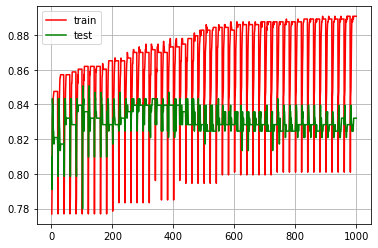

In [57]:
#畫圖
import matplotlib.pyplot as plt
plt.grid()
plt.plot(range(1,1001,1),train_score, color='red',label='train')
plt.plot(range(1,1001,1),test_score, color='green',label='test')
plt.legend()
plt.savefig("n_neighbors&max_depth ")
plt.show()

In [58]:
#i = 6 , j=3
from xgboost import XGBClassifier
xgbc_new = XGBClassifier(n_estimators=6 ,max_depth=3)
xgbc_new.fit(X_train[SelectedFeatures], y_train)
xgbc_new.score(X_train[SelectedFeatures], y_train),xgbc_new.score(X_test[SelectedFeatures], y_test)

(0.8330658105939005, 0.8507462686567164)

In [59]:
# kfold- cross validataion
kfold =KFold(n_splits=5, shuffle=True)
Kf_cv_scores = cross_val_score(xgbc_new,X_train, y_train,cv=kfold)
print(Kf_cv_scores)
print('mean of K fold=',Kf_cv_scores.mean())

[0.8        0.816      0.744      0.87096774 0.81451613]
mean of K fold= 0.8090967741935484


In [60]:
# Confusion matrix :評估模型好壞   
predicted_labels = xgbc_new.predict(X_test)
true_labels = y_test
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_labels, predicted_labels)
print(classification_report(true_labels, predicted_labels))
print("Confusion matrix")
print(cm)

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       166
         1.0       0.91      0.68      0.78       102

    accuracy                           0.85       268
   macro avg       0.87      0.82      0.83       268
weighted avg       0.86      0.85      0.85       268

Confusion matrix
[[159   7]
 [ 33  69]]


名稱說明
* Precision(精確率) ex: 這邊以倖存者來說，在預測倖存者為76人的情況，但實際上僅有69人倖存(91%)

* recall(召回率) ex: 以此例的倖存者來說，實際上有102人倖存，但在此模型中，僅預測倖存者人數為69人(68%)

* f1-score :precision 與 recall的調和平均

* accuracy(準確率): TP和TN把它加總起來除上所有情形個數 ex: (159+69)/268=0.85

* macro avg(巨集平均):所有類別的統計指標加總除以類別數 ex: precision's macro avg=(0.83+0.91)/2 = 0.87

* weighted avg(加權平均)

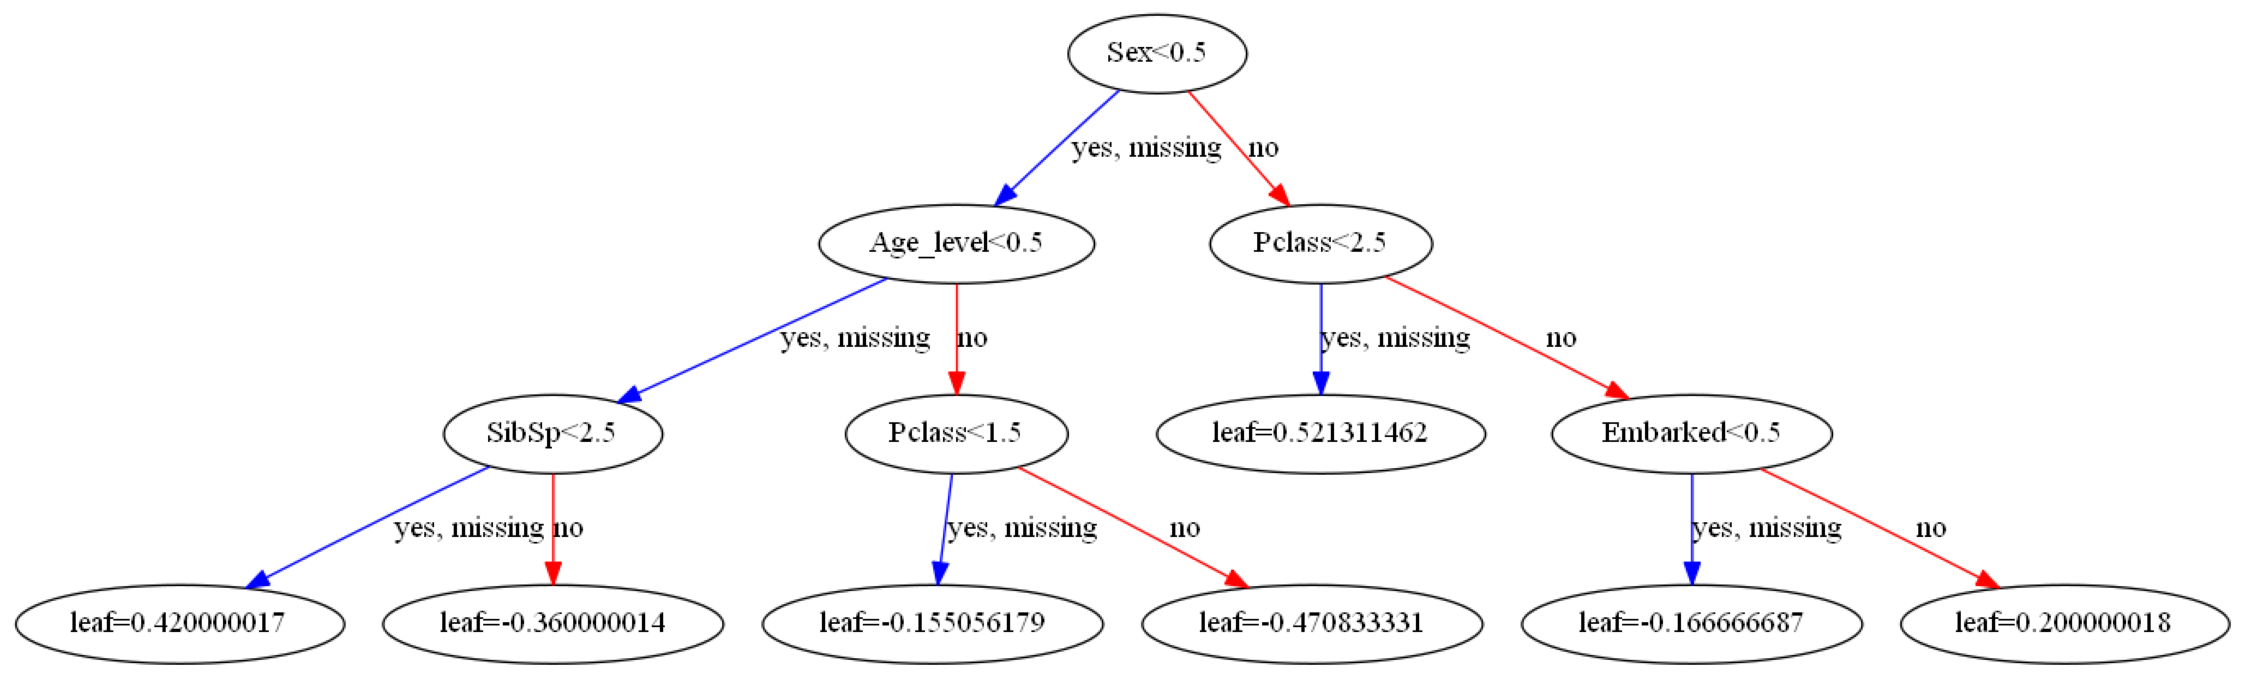

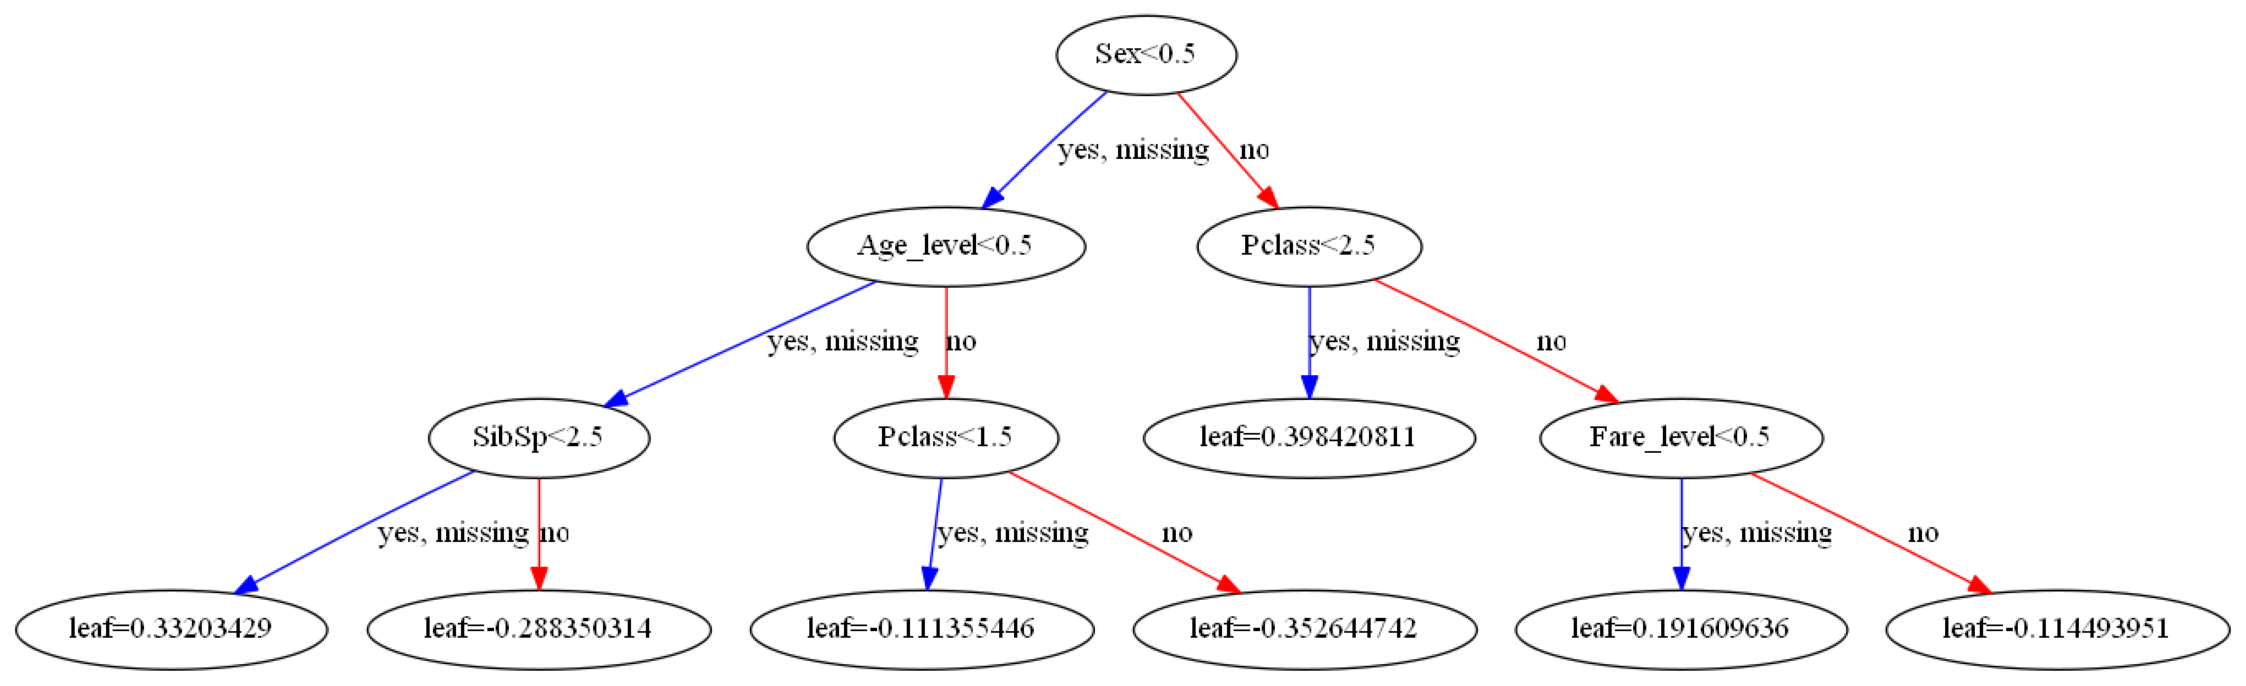

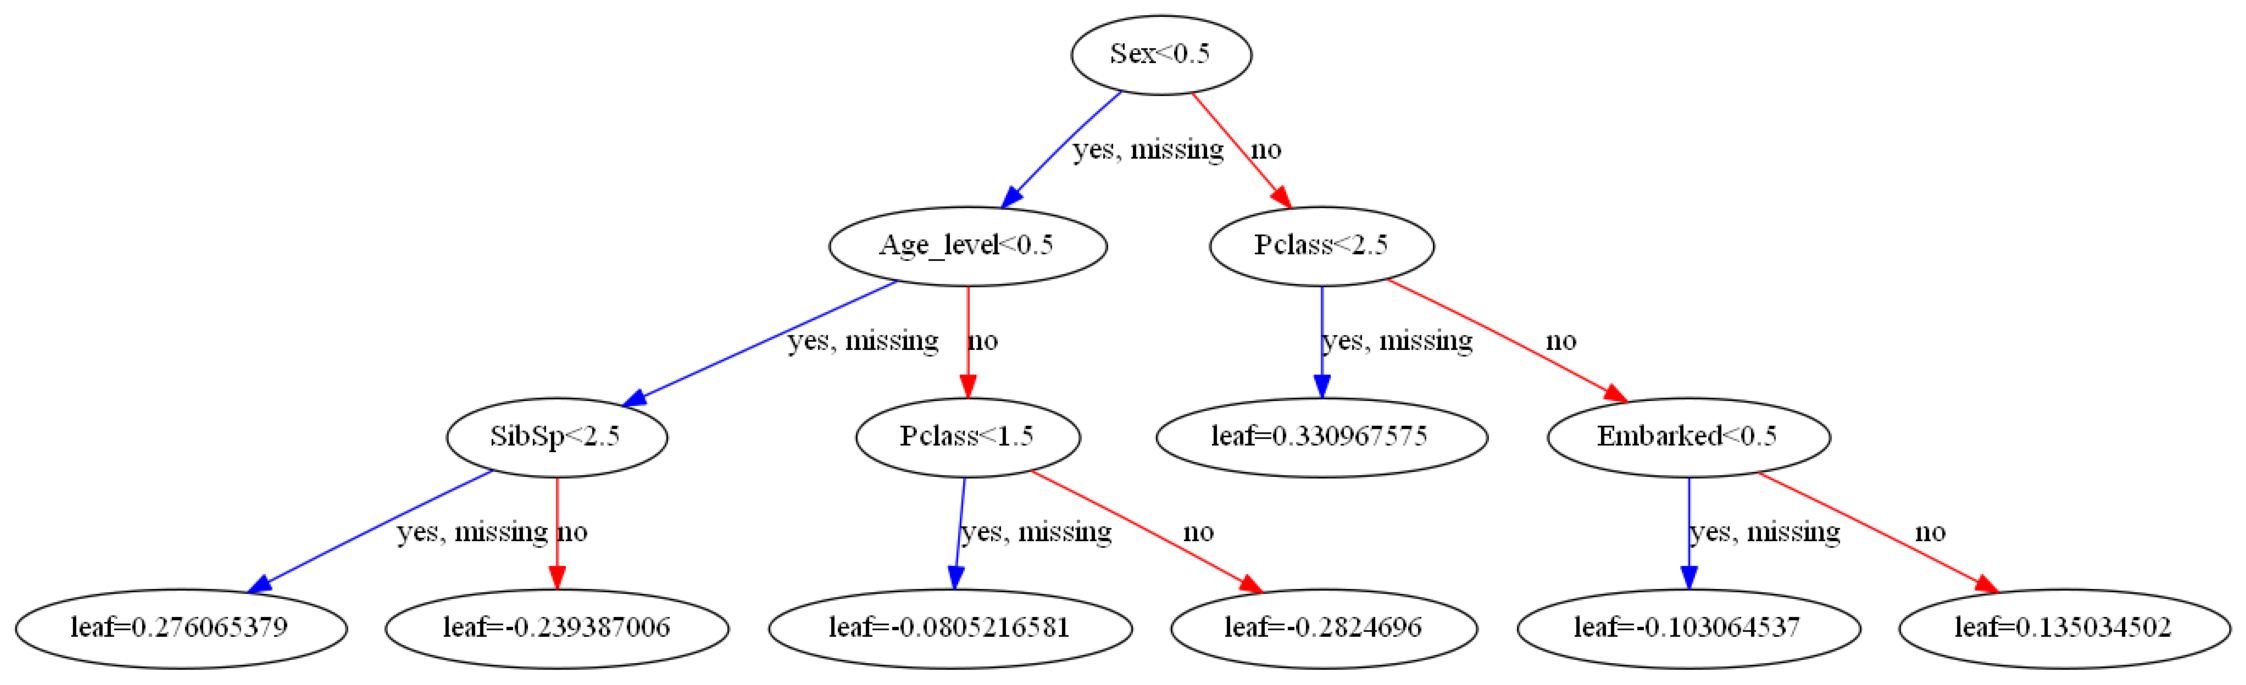

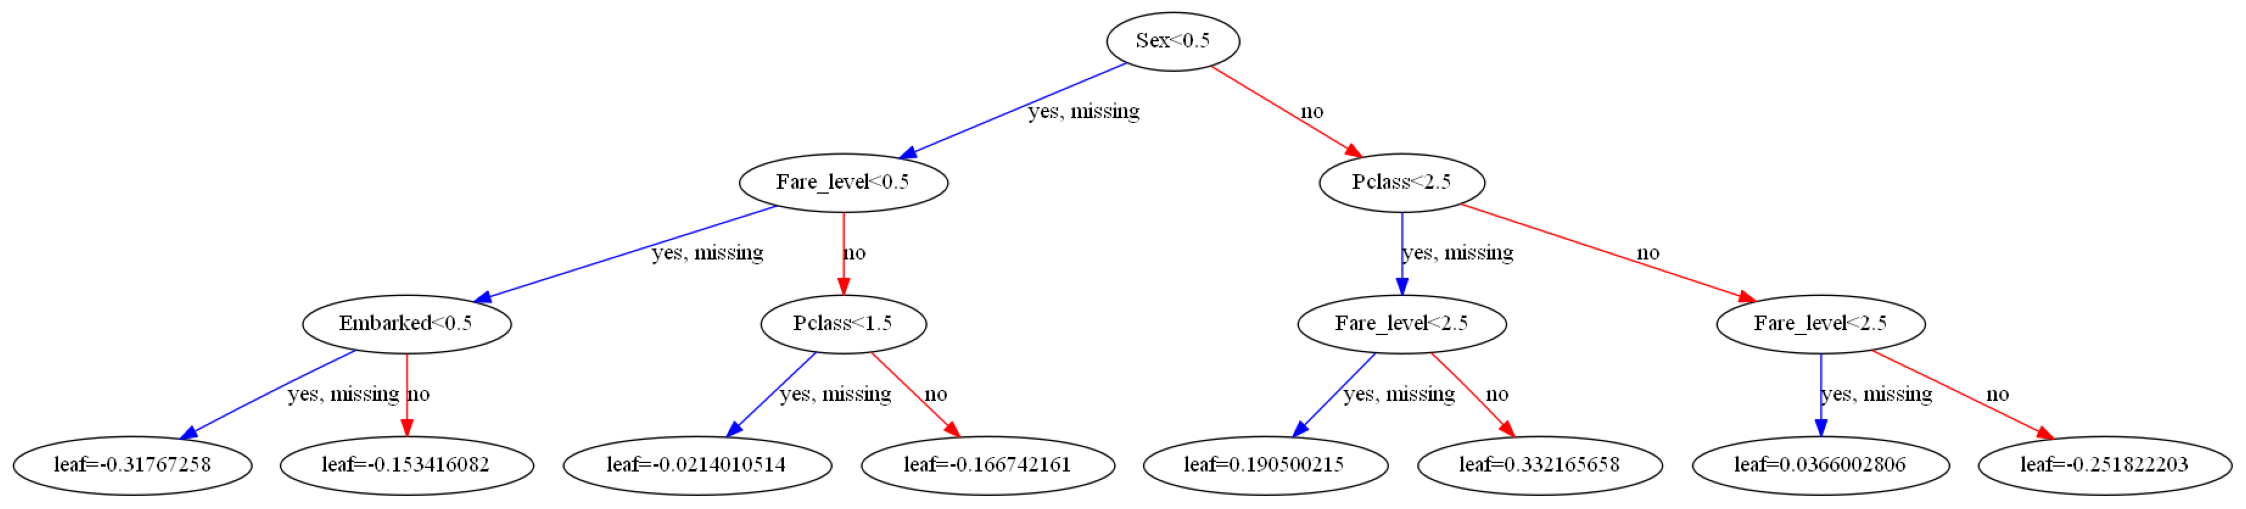

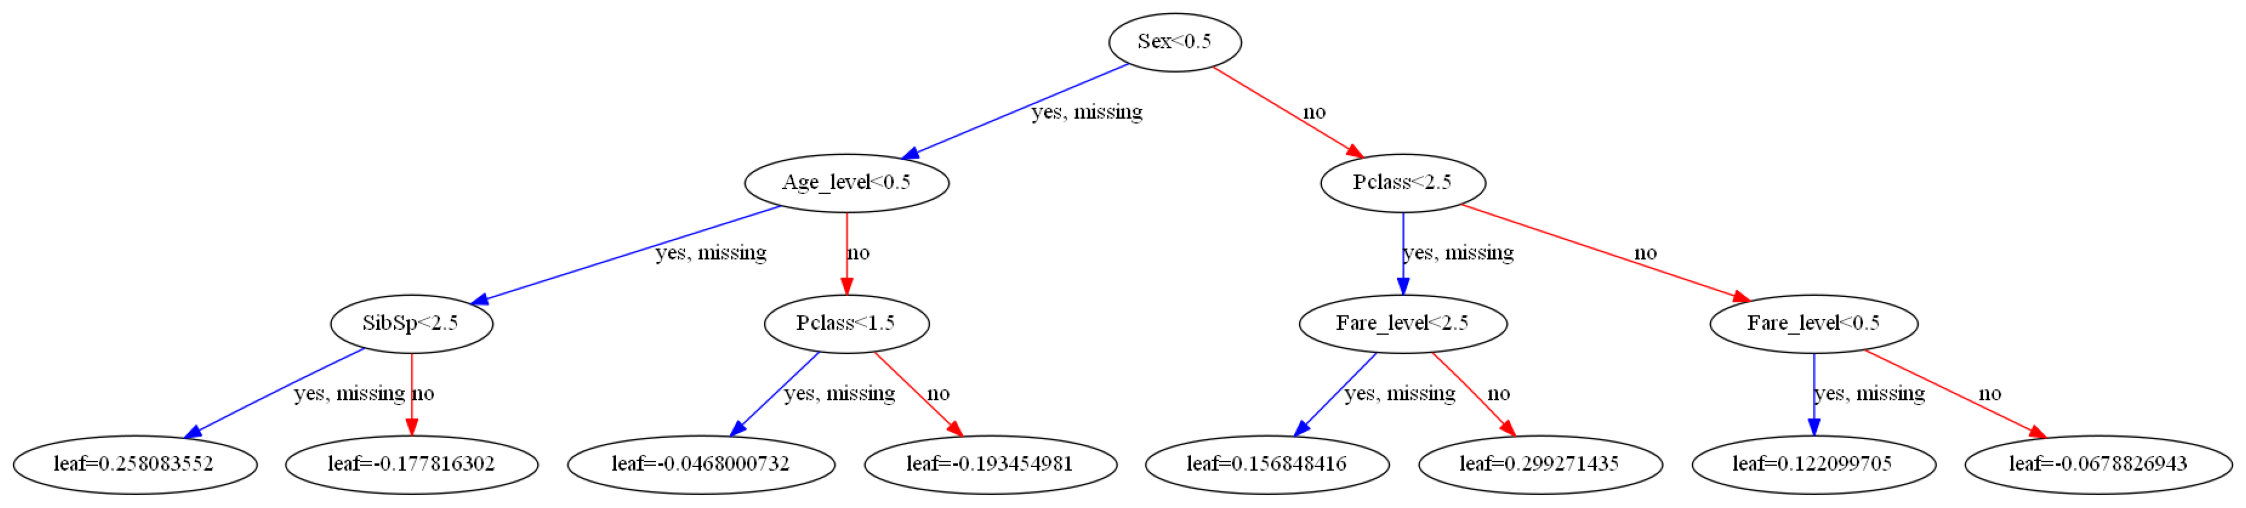

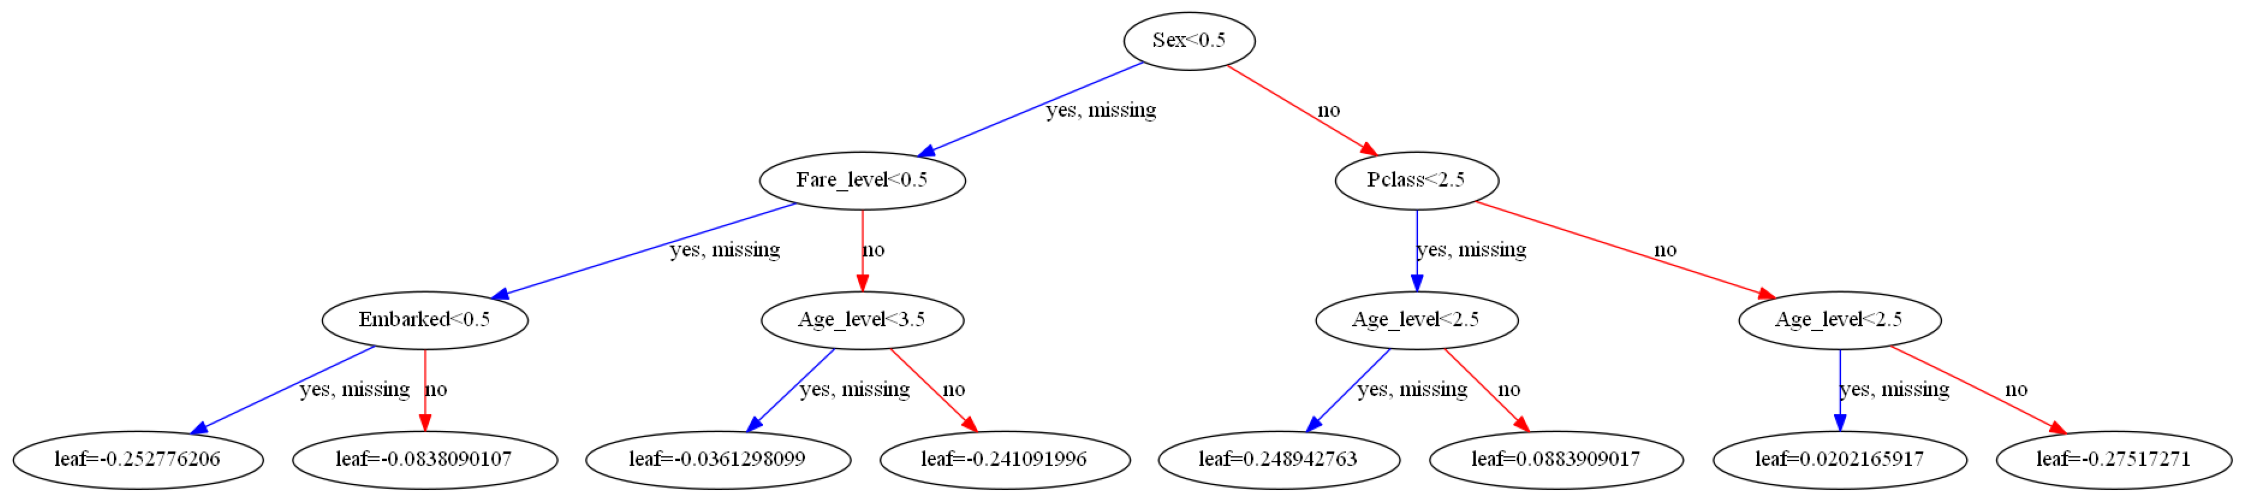

In [61]:
import graphviz
#設置Graphviz路徑
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40, 40) #設定之後所有圖片大小
#XGB樹模型輸出
from xgboost import plot_tree
# plot_tree(xgbc,num_trees=0)
# plot_tree(xgbc,num_trees=1)
# plt.show()
for i in range(0,6):
    plot_tree(xgbc_new,num_trees=i)
    plt.show()

In [62]:
test_result = pd.Series(xgbc_new.predict(Test[SelectedFeatures]),
                        name = "Survived").astype(int)
results = pd.concat([test["PassengerId"], test_result],axis = 1)
results.to_csv("titanic_submissionXGBoost.csv", index = False)
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<font color = blue size=6  >Public Score = 0.77751

# 方法二: KNN(最近鄰居法)

<font  size=5  >選擇K個最近的數據點，並將此數據點分配給大多數K個數據點所屬的種類

![KNN](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png)

In [63]:
SelectedFeatures =["Pclass", 'Sex', 'SibSp','Parch', 'Embarked','Age_level','Fare_level']
X=X_Train[SelectedFeatures]
y=Y_Train
X.shape, y.shape

((891, 7), (891,))

In [64]:
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=1234)
X_train.shape, X_test.shape, y_train.shape , y_test.shape, y_test.sum
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((623, 7), (268, 7), (623,), (268,))

In [65]:
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, y_train)
KNN.score(X_train, y_train), KNN.score(X_test, y_test)

(0.8603531300160514, 0.7798507462686567)

In [66]:
from sklearn.neighbors import KNeighborsClassifier 
#加入n ,把 accuracy 設為一個空的list
accuracy = []
for n in range(1,101,1):
    KNN = KNeighborsClassifier(n_neighbors=n)
    KNN.fit(X_train, y_train)
    accuracy.append((KNN.score(X_train, y_train), KNN.score(X_test, y_test)))

In [67]:
#accuracy

In [68]:
train_score = [t[0] for t in accuracy ]
test_score = [t[1] for t in accuracy ]
print(max(test_score))
print(test_score.index(max(test_score)))

0.7873134328358209
4


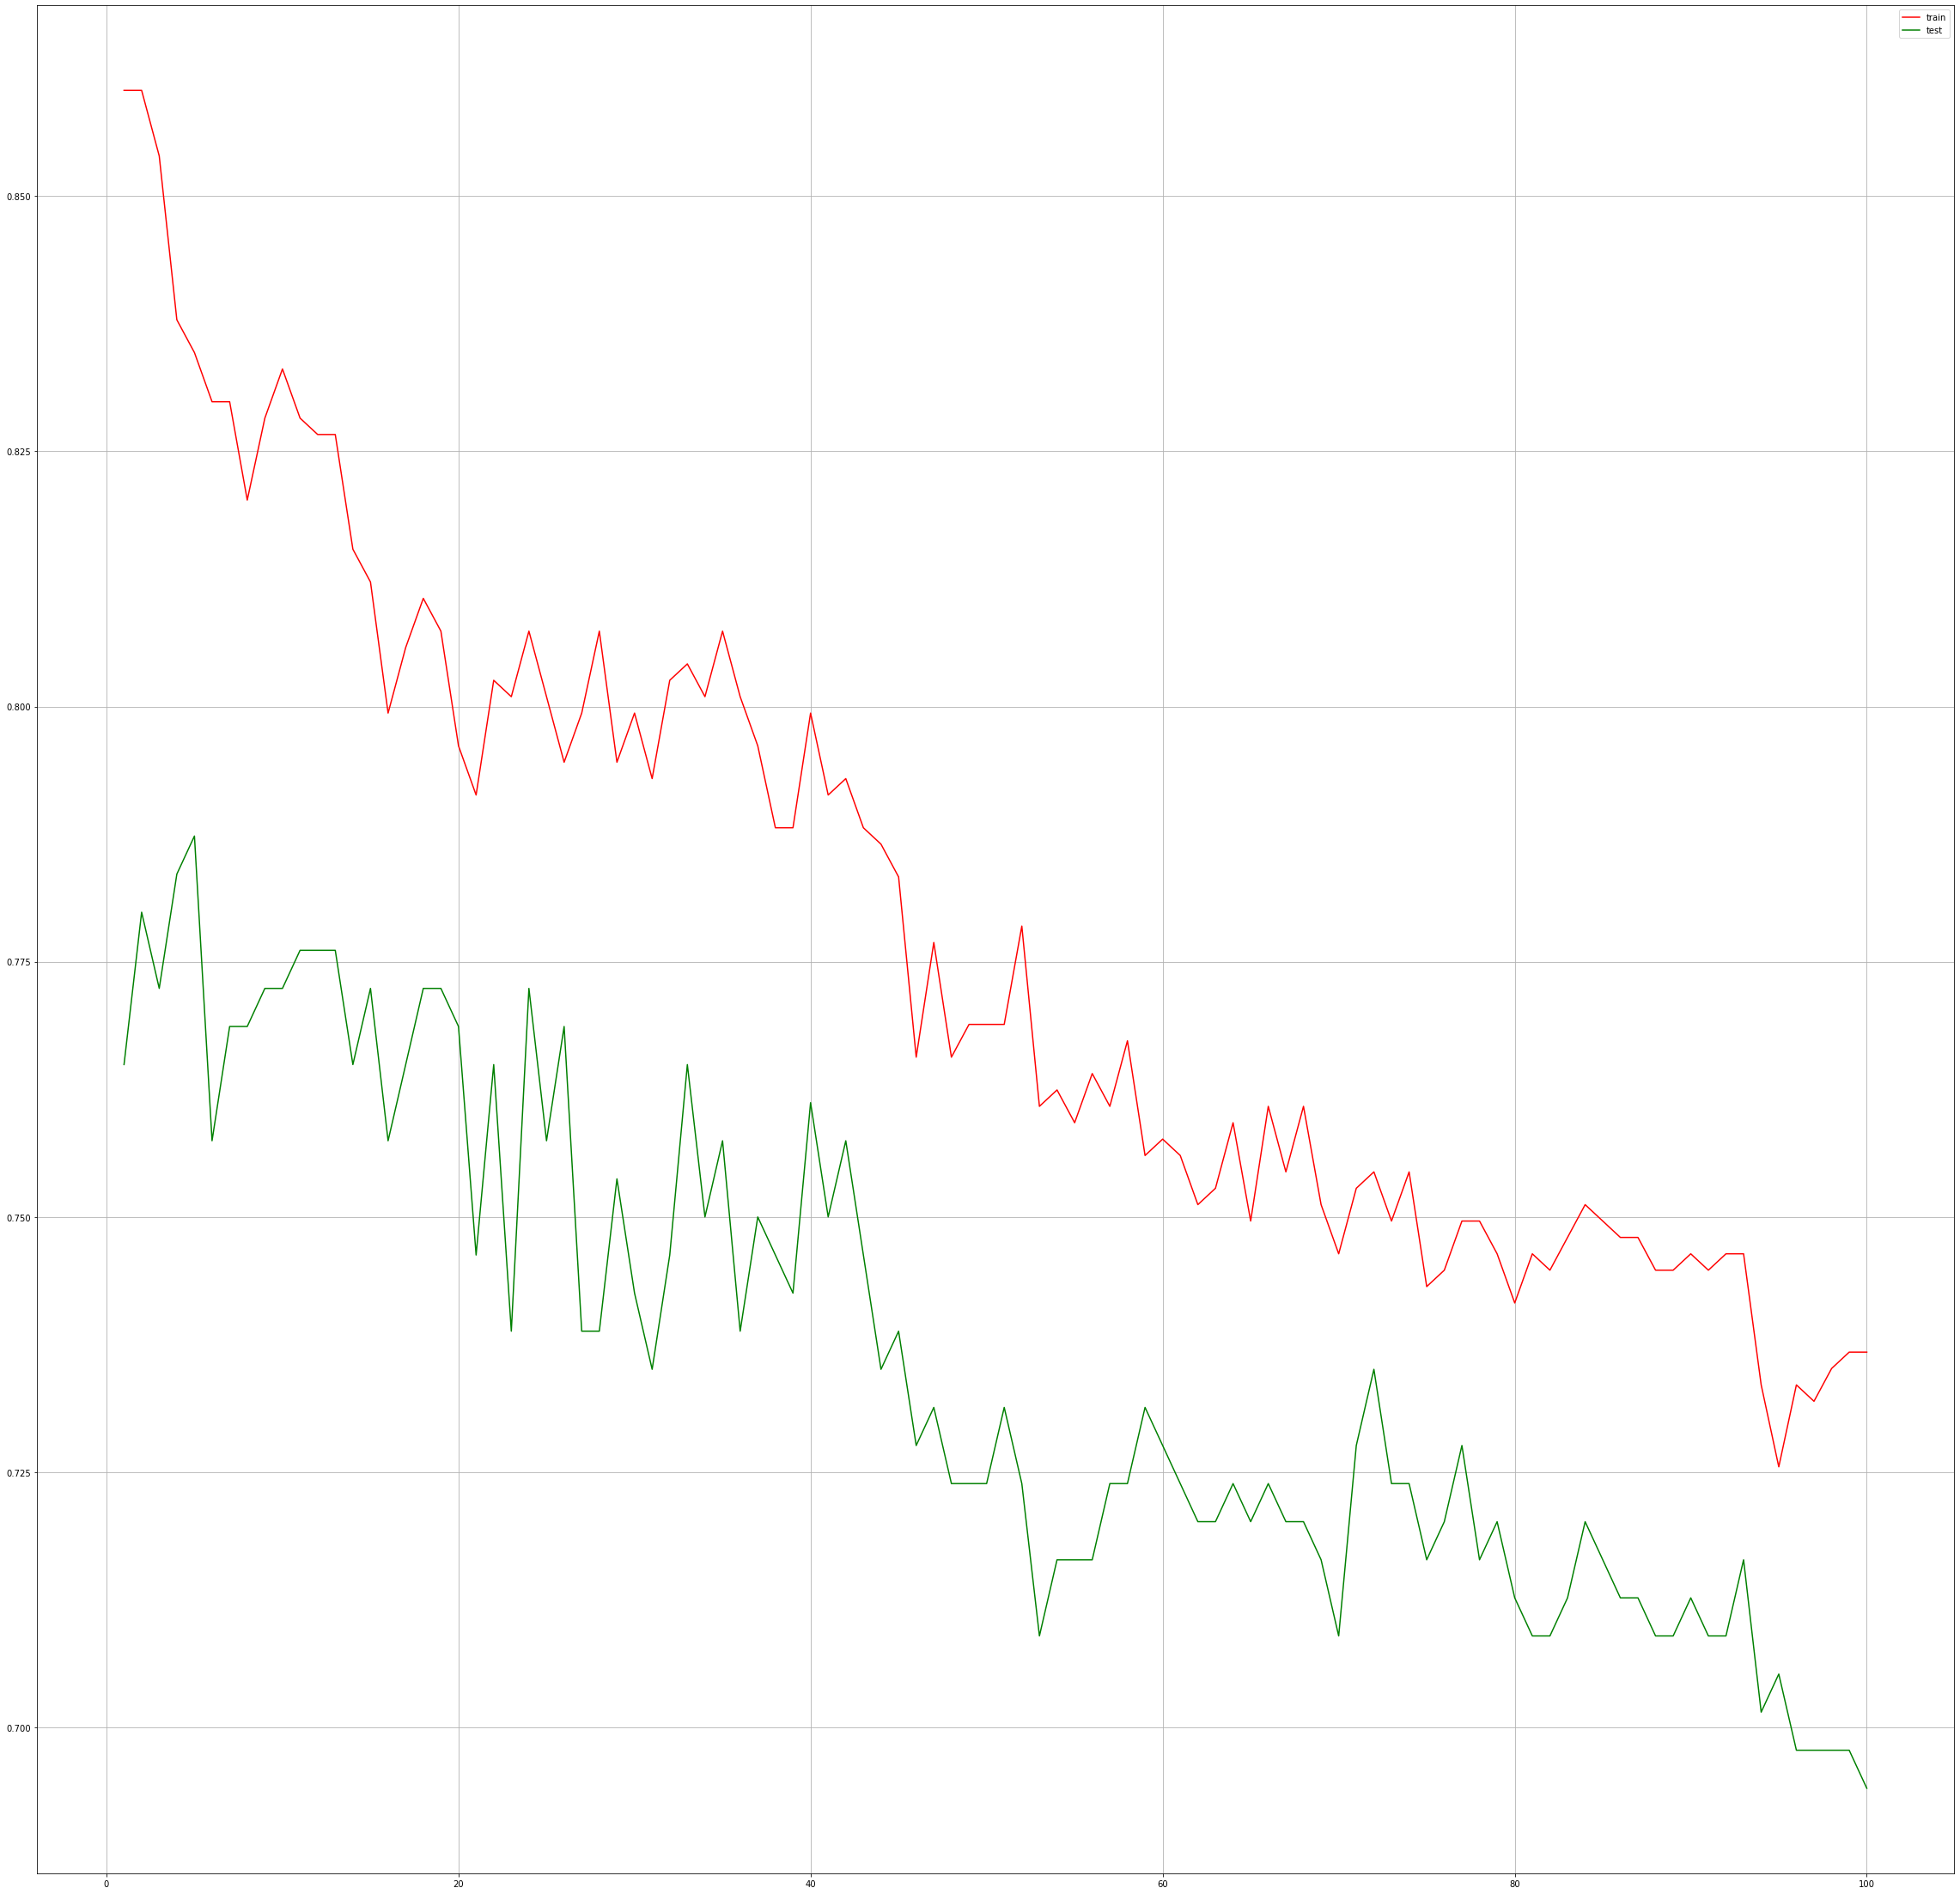

In [69]:
#畫圖
import matplotlib.pyplot as plt
plt.grid()
plt.plot(range(1,101,1),train_score, color='red',label='train')
plt.plot(range(1,101,1),test_score, color='green',label='test')
plt.legend()
plt.savefig("n_neighbors")
plt.show()

In [70]:
# n_neighbors=5
from sklearn.neighbors import KNeighborsClassifier
KNN_new = KNeighborsClassifier(n_neighbors=5)
KNN_new.fit(X_train, y_train) 
KNN_new.score(X_train, y_train), KNN_new.score(X_test, y_test)

(0.8346709470304976, 0.7873134328358209)

In [71]:
from sklearn.model_selection import cross_val_score, KFold
# kfold- cross validataion
kfold =KFold(n_splits=5, shuffle=True)
Kf_cv_scores = cross_val_score(KNN_new,X_train, y_train,cv=kfold)
print(Kf_cv_scores)
print('mean of K fold=',Kf_cv_scores.mean())

[0.848      0.848      0.768      0.79032258 0.78225806]
mean of K fold= 0.8073161290322581


In [72]:
# Confusion matrix    
predicted_labels = KNN_new.predict(X_test)
true_labels = y_test
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_labels, predicted_labels)
print(classification_report(true_labels, predicted_labels))
print("Confusion matrix")
print(cm)

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       166
         1.0       0.74      0.68      0.71       102

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.79      0.79       268

Confusion matrix
[[142  24]
 [ 33  69]]


In [73]:
test_result1 = pd.Series(KNN_new.predict(Test[SelectedFeatures]), 
                         name = "Survived").astype(int)
results1 = pd.concat([test["PassengerId"], test_result1],axis = 1)
results1.to_csv("titanic_submission(KNN).csv", index = False)
results1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<font color = blue size=6  >Public Score = 0.71291

# 方法三: RandomForest(隨機森林)

<font size=4> * 隨機森林，是用隨機的方式建立一個森林，森林裡面由很多的決策樹組成，而決策樹彼此是沒有關聯的。<br/>* 每一棵樹都會產生一個分類選擇，而再由多數決的方式，決定該樣本的預測值(分類選擇)

![RF](https://miro.medium.com/max/602/1*iWHiPjPv0yj3RKaw0pJ7hA.png)

In [74]:
SelectedFeatures = ["Pclass", 'Sex', 'SibSp','Parch', 'Embarked',  'Age_level','Fare_level']
X=X_Train[SelectedFeatures]
y=Y_Train
X.shape, y.shape

((891, 7), (891,))

In [75]:
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=1234)
X_train.shape, X_test.shape, y_train.shape , y_test.shape, y_test.sum
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((623, 7), (268, 7), (623,), (268,))

In [76]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=5 ,max_depth=6)
RFC.fit(X_train[SelectedFeatures], y_train)

RandomForestClassifier(max_depth=6, n_estimators=5)

In [77]:
#訓練資料評估 與 測試資料評估
RFC.score(X_train[SelectedFeatures], y_train),RFC.score(X_test[SelectedFeatures], y_test)

(0.85553772070626, 0.8171641791044776)

<font color = blue size=5  >GridSearch

 <font  size=4  >為一種調整參數的方法

In [91]:
#調整'n_estimators'and 'max_depth'
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
clf = RandomForestClassifier()
param_dist = {'n_estimators':[5,10,20,30,40],
              'max_depth':range(1,11,1) }
grid=GridSearchCV(estimator = clf,
                  param_grid = param_dist, 
                  scoring='accuracy',
                  cv=5
                  )
grid.fit(X_train, y_train) # 用訓練資料集來找最佳參數
print("Best parameters found: ",grid.best_params_)
print("Best Accuracy  found: ", grid.best_score_)


Best parameters found:  {'max_depth': 4, 'n_estimators': 40}
Best Accuracy  found:  0.8201290322580645


In [92]:
#'max_depth': 4, 'n_estimators': 40
from sklearn.ensemble import RandomForestClassifier
RFC1=RandomForestClassifier(n_estimators=40, max_depth=4)
RFC1.fit(X_train[SelectedFeatures], y_train)
#訓練資料評估 與 測試資料評估
RFC1.score(X_train[SelectedFeatures], y_train),RFC1.score(X_test[SelectedFeatures], y_test)

(0.8443017656500803, 0.835820895522388)

In [93]:
# kfold- cross validataion
kfold =KFold(n_splits=5, shuffle=True)
Kf_cv_scores = cross_val_score(RFC1,X_train, y_train,cv=kfold)
print(Kf_cv_scores)
print('mean of K fold=',Kf_cv_scores.mean())

[0.888      0.8        0.824      0.80645161 0.80645161]
mean of K fold= 0.8249806451612903


In [94]:
# Confusion matrix    
predicted_labels = RFC1.predict(X_test)
true_labels = y_test
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_labels, predicted_labels)
print(classification_report(true_labels, predicted_labels))
print("Confusion matrix")
print(cm)

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       166
         1.0       0.88      0.66      0.75       102

    accuracy                           0.84       268
   macro avg       0.85      0.80      0.81       268
weighted avg       0.84      0.84      0.83       268

Confusion matrix
[[157   9]
 [ 35  67]]


In [95]:
test_result1 = pd.Series(RFC1.predict(Test[SelectedFeatures]), 
                         name = "Survived").astype(int)
results1 = pd.concat([test["PassengerId"], test_result1],axis = 1)
results1.to_csv("titanic_submissionRFC.csv", index = False)
results1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<font color = blue size=6  >Public Score = 0.78229

 <font  size=4  >Public Score:  RandomForest > XGBoost > KNN

 <font  size=4  >●討論:為何Public Score無法超過0.8?

# ●心得與未來